In [1]:
# Importing dependencies

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 
import warnings 
import seaborn  as sns
warnings.filterwarnings
mpl.style.use('ggplot')

In [2]:
car_df = pd.read_csv('quikr_car.csv')
car_df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [3]:
# printing col names
for cols in car_df:
    print(cols)

name
company
year
Price
kms_driven
fuel_type


In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


Cleaning data

In [5]:
car_df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

1. Year columns has many no year values
2. We have to  change it to numeric values

In [6]:
car_df = car_df[car_df['year'].str.isnumeric()]
car_df['year'] = car_df['year'].astype(int)


In [7]:
car_df['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

Price has ask for price


In [8]:
car_df = car_df[car_df['Price'] != 'Ask For Price']

In [9]:
car_df['Price'] = car_df['Price'].str.replace(',' ,'').astype(int)

Kms_driven has  object km in last

In [10]:
car_df['kms_driven'] = car_df['kms_driven'].str.split().str.get(0).str.replace(',' ,'')

In [11]:
car_df = car_df[car_df['kms_driven'] != 'Petrol']

In [12]:
car_df['kms_driven']= car_df['kms_driven'].astype(int)

Fuwl columns has nan values

In [13]:
car_df = car_df[~car_df['fuel_type'].isna()]

In [14]:
car_df.shape

(816, 6)

Changing car names. Keeping only the first three words

In [15]:
car_df['name'] =car_df['name'].str.split().str.slice(0,3).str.join(' ')

Cleaned data

In [16]:
car_df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [17]:
car_df.to_csv('Cleaned_car_data.csv')

In [18]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [19]:
car_df.describe(include = 'all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [20]:
car_df = car_df[car_df['Price']<6000000]

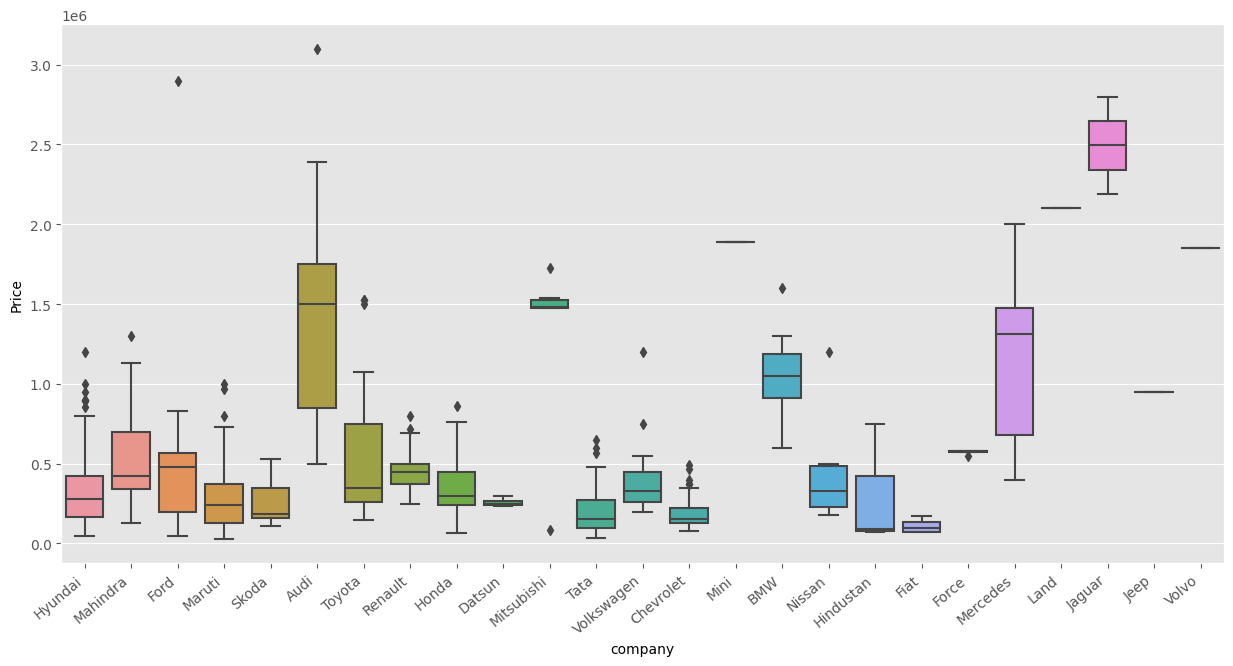

In [21]:
plt.subplots(figsize=(15,7))
ax = sns.boxplot(x= 'company' ,y = 'Price' ,data = car_df)
ax.set_xticklabels(ax.get_xticklabels(),  rotation = 40 ,ha = 'right')
plt.show()

Checking relationship of Year with Price


c:\Users\bhavi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\bhavi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\bhavi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\bhavi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg

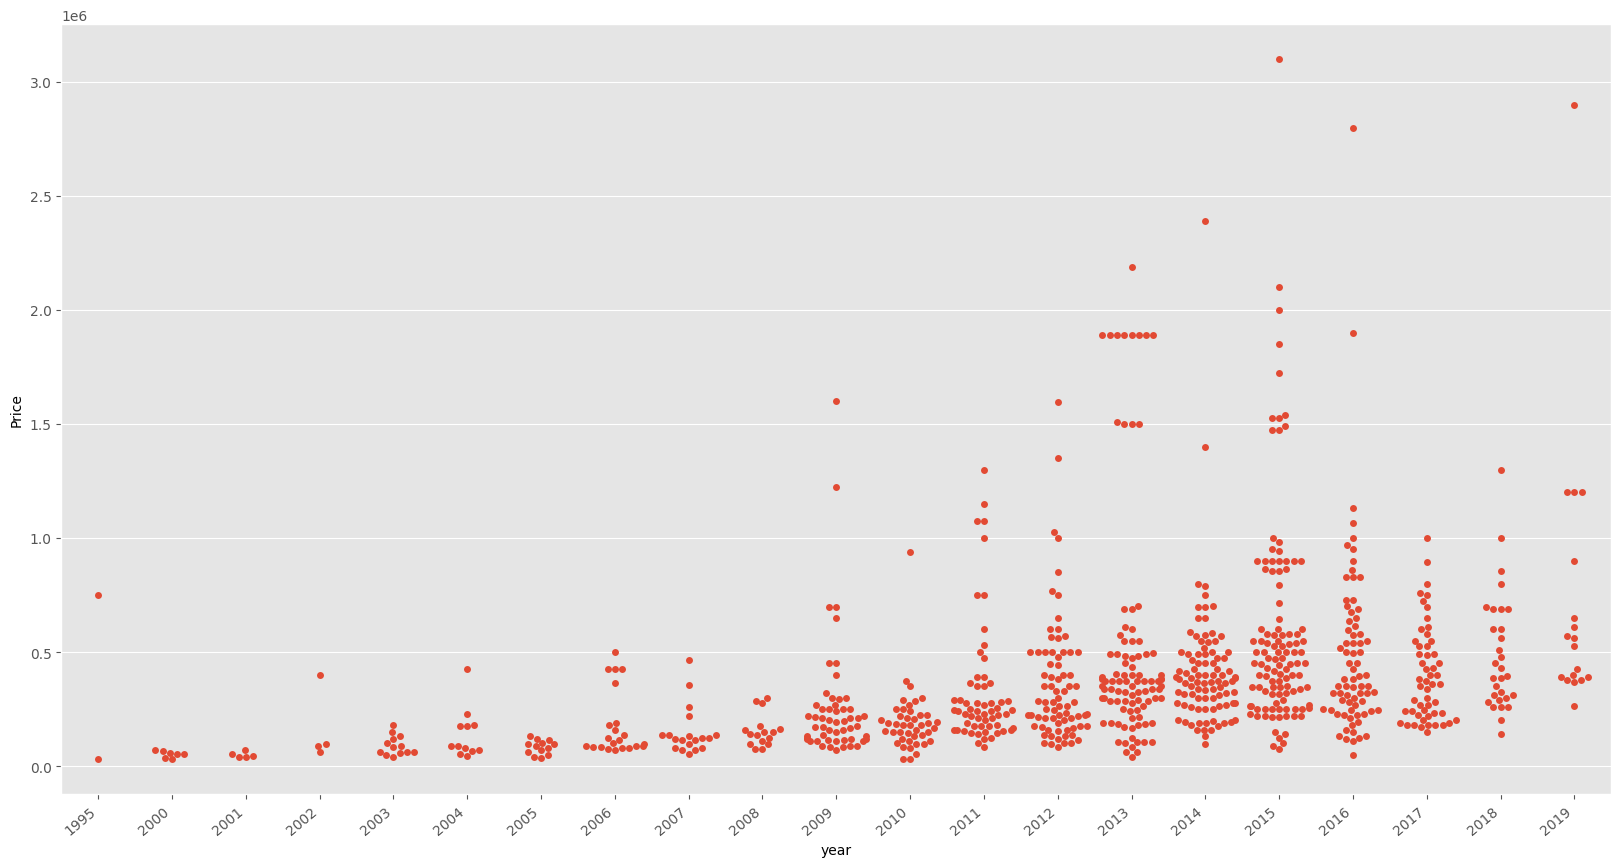

In [22]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x = 'year' , y = 'Price' , data = car_df)
ax.set_xticklabels(ax.get_xticklabels() , rotation = 40 , ha = 'right')
plt.show()

Checking relationship of kms_driven with Price

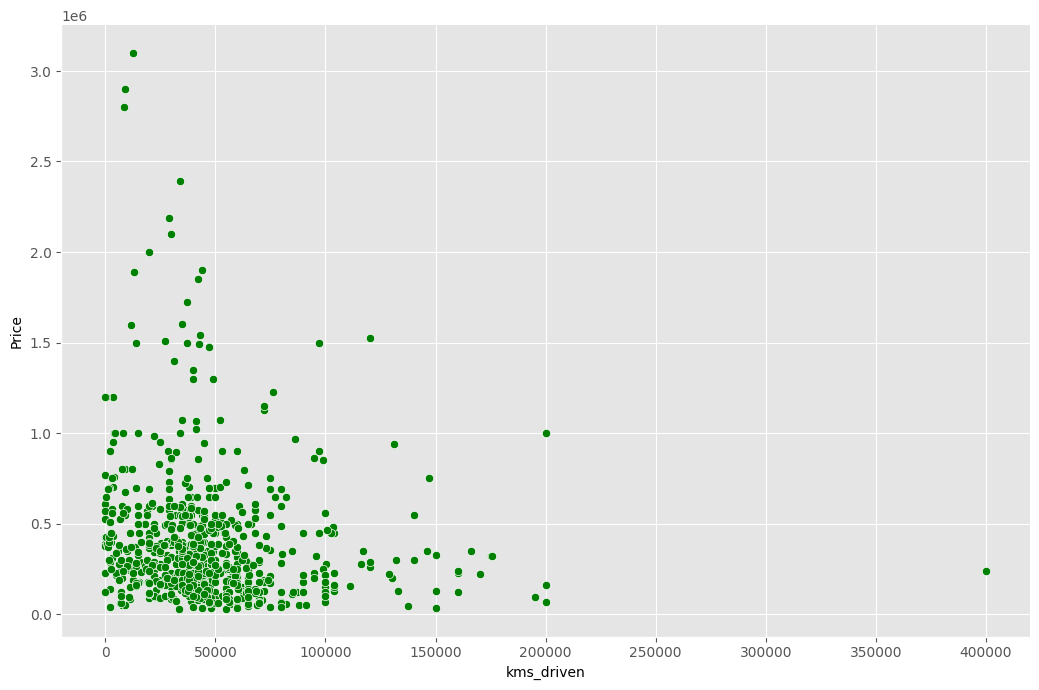

In [23]:
sns.relplot(x='kms_driven',y='Price',data=car_df,height=7,aspect=1.5 ,color = 'green')

Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

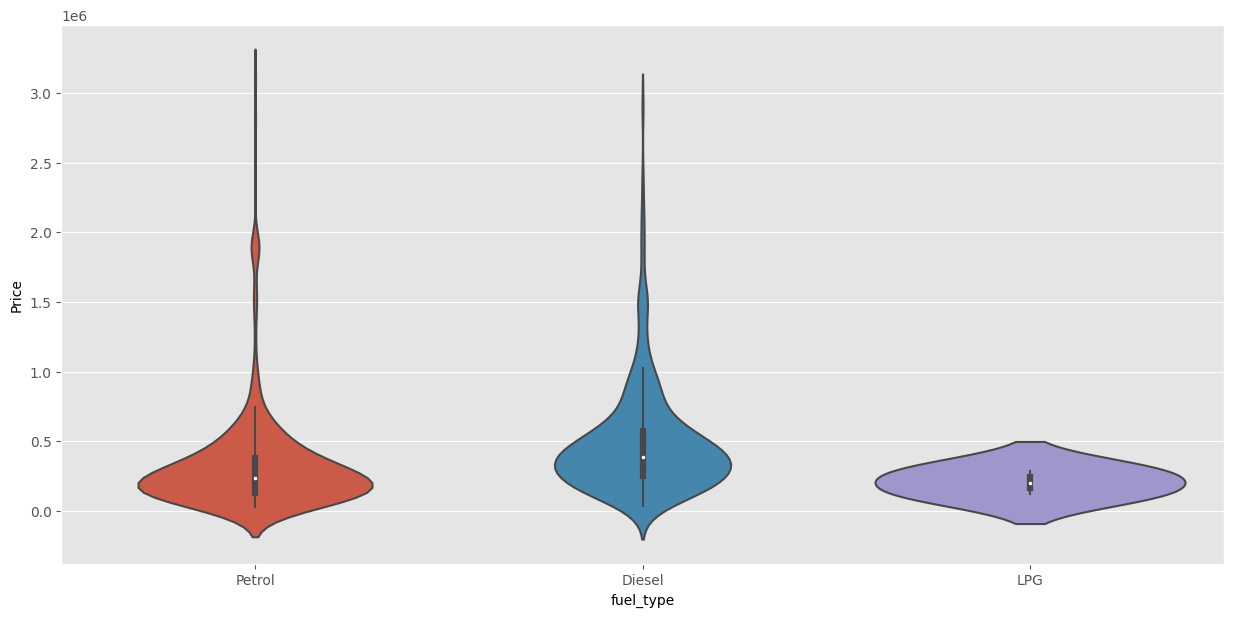

In [24]:
plt.subplots(figsize = (15,7))
sns.violinplot(x= 'fuel_type' ,y = 'Price' ,data =car_df)

Relationship of Price with FuelType, Year and Company mixed


<Figure size 1500x700 with 0 Axes>

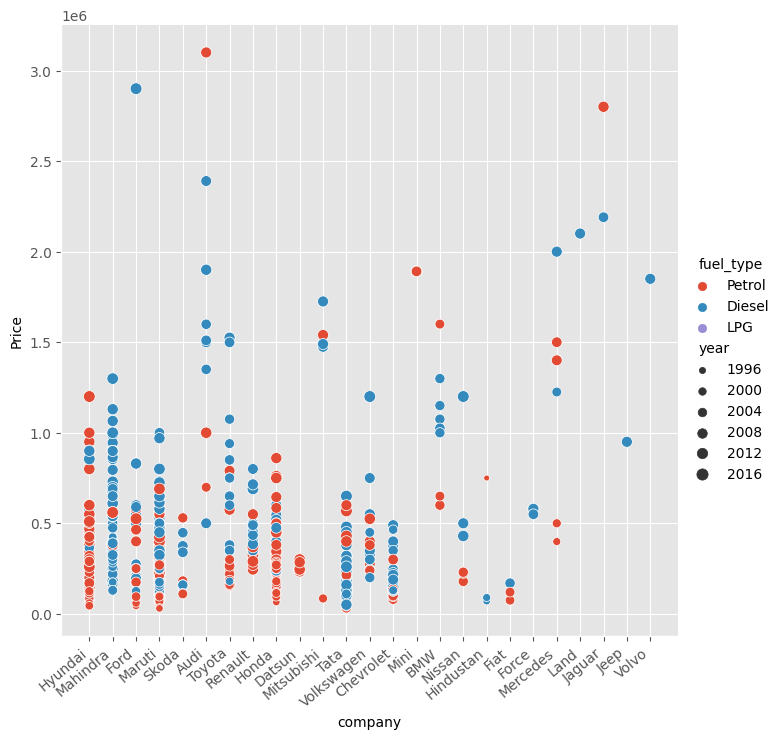

In [25]:
plt.figure(figsize=(15,7))
ax =sns.relplot(x ='company' ,y = 'Price' , data =car_df ,size ='year',
                hue ='fuel_type',
                height = 7)
ax.set_xticklabels(rotation = 40 ,  ha ='right')

Extracting Training Data

In [26]:
X=car_df[['name','company','year','kms_driven','fuel_type']]
y=car_df['Price']

Applying trainig test split


In [27]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train , y_test =train_test_split(X,y, test_size= 0.2)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

Creating an onehotencoder object to contain all the possible categories

In [29]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

Creating column transformer to transform categorical columns

In [30]:
column_trans = make_column_transformer((OneHotEncoder(categories= ohe.categories_),
                                        ['name','company','fuel_type']),
                                       remainder='passthrough')

Linear regression model


In [31]:
lr = LinearRegression()

Making a pipeline


In [32]:
pipe = make_pipeline(column_trans ,lr)

Fitting the model

In [33]:
pipe.fit(X_train ,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [34]:
y_pred = pipe.predict(X_test)

Checking r2 Score

In [35]:
r2_score(y_test,y_pred)

0.6380144840483215

Finding the model with a random state

In [36]:
scores = []
for i in  range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [37]:
np.argmax(scores)

302

In [38]:
print(" max score-------------->",scores[np.argmax(scores)])

 max score--------------> 0.8991190499074018


In [39]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([430382.81414542])

The best model is found at a certain random state

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print("R2-score----------->",r2_score(y_test,y_pred))

R2-score-----------> 0.8991190499074018


In [41]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([456549.33356479])

In [42]:
import pickle

In [43]:
pickle.dump(pipe ,open('LinearRegressionModel.pkl' , 'wb'))